\newpage

In [1]:
# package 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn import neighbors
from sklearn import metrics
import statsmodels.api as sm
from patsy import dmatrices, dmatrix
import requests
import re

/Users/yaohongbo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yaohongbo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Q1
The classification problem based on the dataset is using classification algorithms to predict wheather a person have chronic kidney disease based on various medical indicators and test results. We need to use classification algorithms to divided the data into those who have chronic kidney disease (CKD) and those who do not have (non-CKD). We can use feature such as blood pressure, serum creatinine, hemoglobin levels, glucose, and so on. The target variable is the binary variable class, which include the infomation of ckd or not ckd.

In [2]:
# import data
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

## Q2
From 02 sub-set selection example. We will drop NA and change categorical variables to numerical. 

We concat response variable y into X to make sure they have same index

In [3]:
df = pd.concat([X, y], axis=1)
df.shape

(400, 25)

## Q3 

In [4]:
df.shape

(400, 25)

There are 400 observations and 25 variables

In [5]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

There are 11 categorical variables and 14 numerical variables

In [6]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


The variable`wbcc`  have the largest standard deviation.

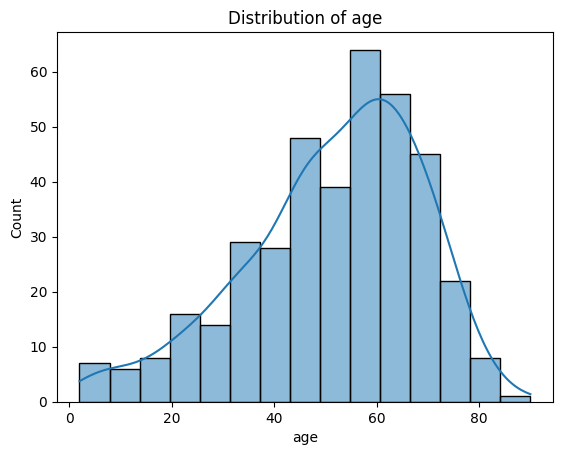

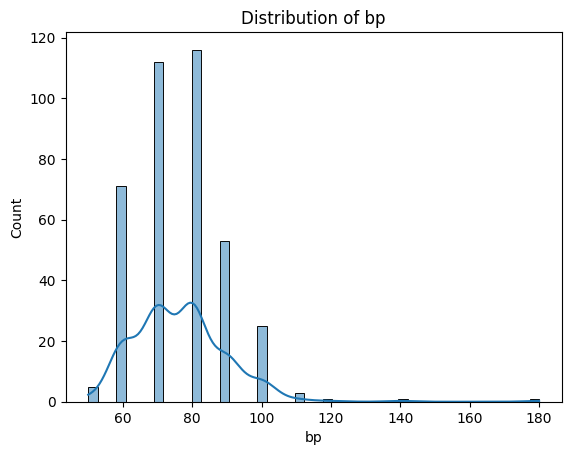

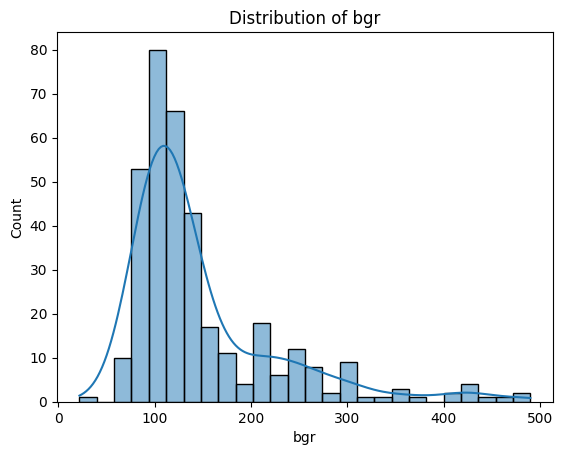

In [7]:
for col in ['age', 'bp', 'bgr']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The dataset contains both numerical (float64) and categorical (object) variables

Some variable have lots of missing value, notably presenting in rbc with 152 missing entries, wbcc with 106, and rbcc with 131.

From Summary Statistics, we found some numarical variable have a large range, for example age cover from 2 to 90 years, and bgr cover from 22 to 490. We can also find there are some outliers(for example from bgr, bu, and sc) which are far away from the 75th percentile might indicating some healthy issue.

From the distribution plot, we found the distribution of age has a slight left-skew and distribution of bgr is right-skewed. Which indicating we might need to do the log transformation. 

## Q4

### Correlation Analysis

Correlation Heat Map for numerical data only

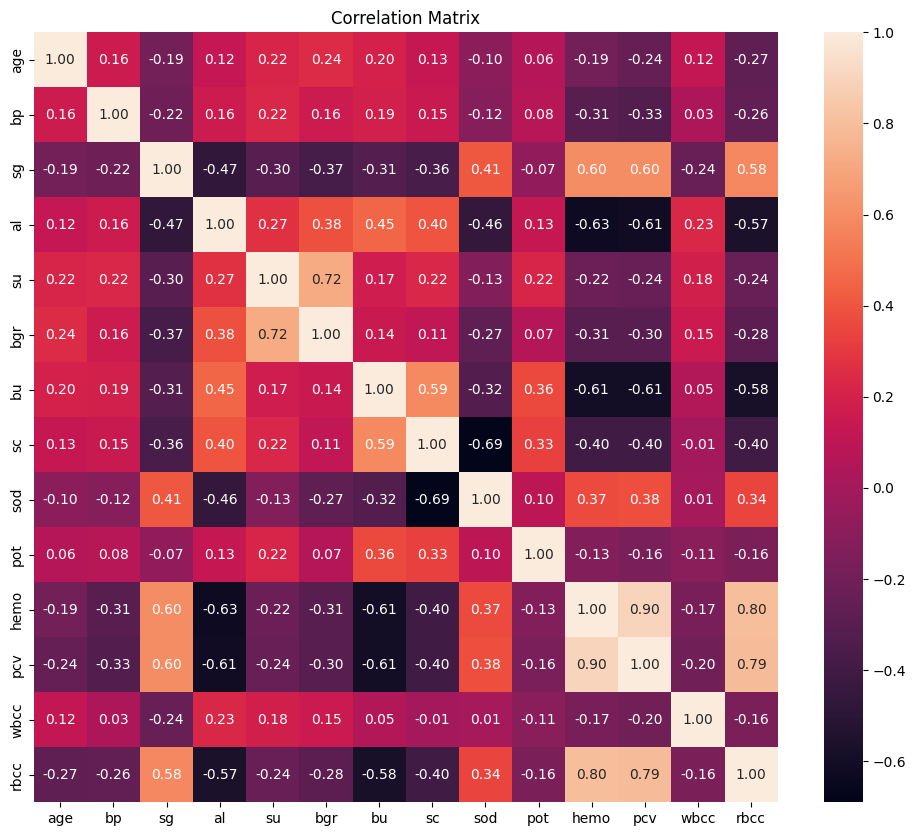

In [8]:
## Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
## Plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Categorical Data to Num, re-heatmap

/Users/yaohongbo/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/yaohongbo/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


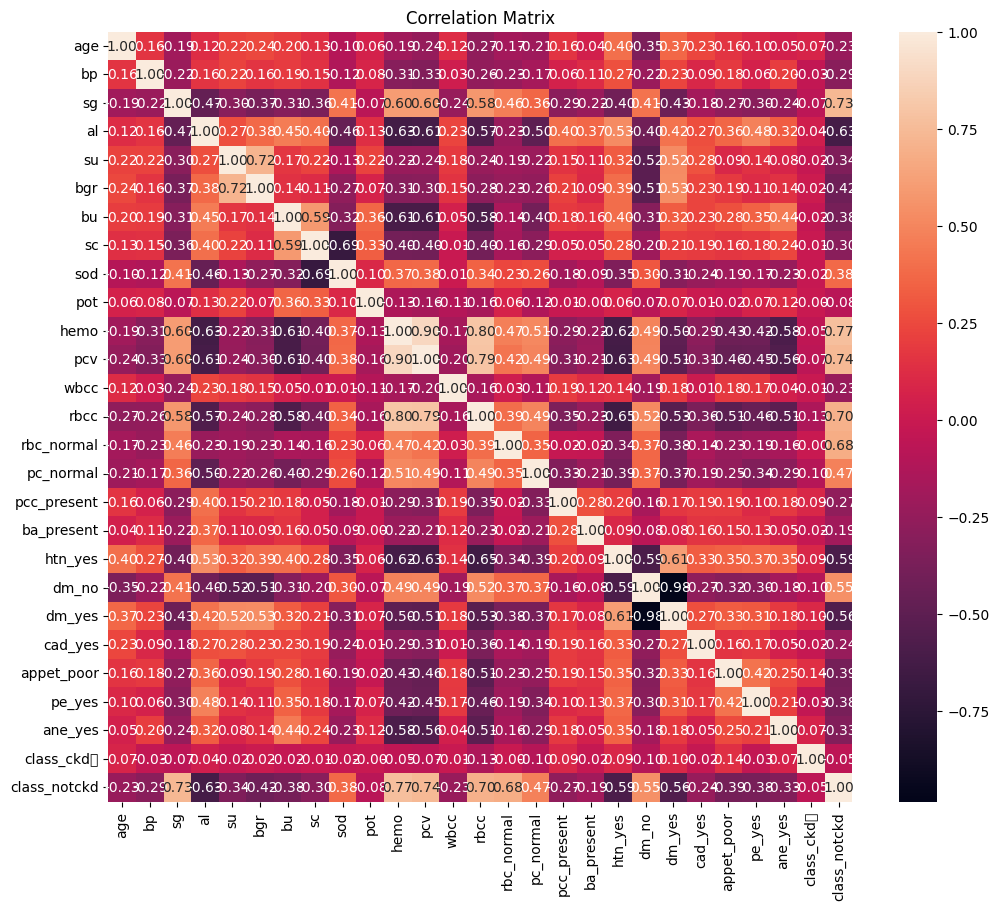

In [9]:
## Convert categorical variable into dummy/indicator variables
## one-hot encoding for avoid multicollinearity
df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

For instance, the correlation between hemo and pcv (hemoglobin and packed cell volume) is so high that these two are likely to be associated hematological measurements with a correlation coefficient of 0.9.

Similarly, sc (serum creatinine) and bgr (blood glucose random) are highly positively correlated. Thus, it might be inferred that there is an association between blood sugar levels and kidney function, but this will require further clinical context to interpret correctly.

The level of hemoglobin has a strong negative relationship with the level of sc with a correlation coefficient of -0.69 implying that the increasing levels of serum creatinine leads to reduction in hemoglobin; which may indicate impaired renal function affecting red blood cell count.

### Pair Plot

Observe that `hemo`, `pcv`, `sc`, `bgr` has strong multicollinear with other variables, we would like to check the pair plot

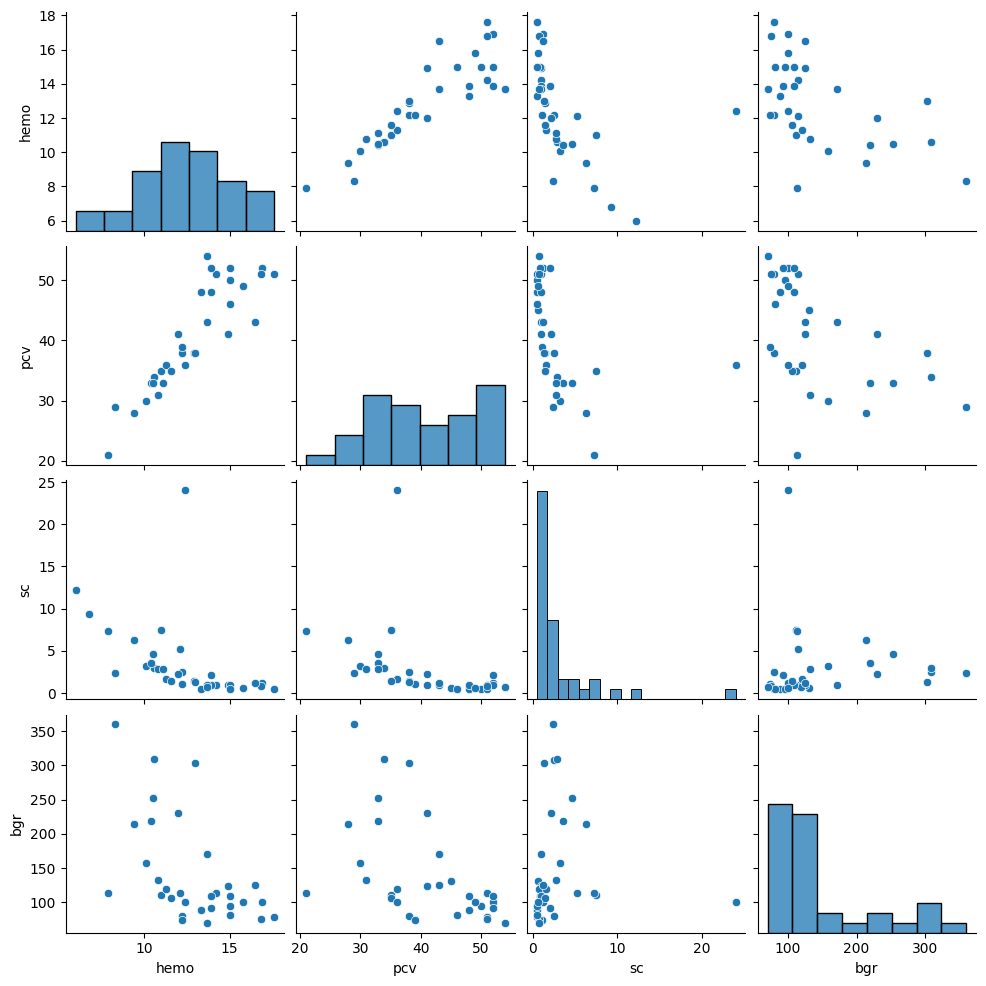

In [10]:
## Reduce the sample size
sampled_df = numeric_df.sample(frac=0.1, random_state=1)

## Select high multicollinear variables
columns_to_plot = ['hemo', 'pcv', 'sc', 'bgr']
subset_df = sampled_df[columns_to_plot]

## plot
sns.pairplot(subset_df)
plt.show()

- Hemoglobin (hemo) and Packed Cell Volume (pcv): As we can see from the scatter plot, hemoglobin and packed cell volume have a strong positive linear relationship. This is logical because both are connected with the capacity of blood to carry oxygen. The histogram of each variable shows an approximately normal distribution shape, which means that our dataset contains values within a wide range.

- Serum Creatinine (sc): Serum creatinine levels are right-skewed distributed, indicating that most people have low levels while a few outliers possess very high ones. This is a typical distribution for serum creatinine in general population samples where kidney impairment may only occur among some individuals. Also, there is an apparent down-trend on scatter plots between sc vs hemo as well as sc versus pcv – higher creatinine concentration relates inversely with haemoglobin concentration and packed cell volume; this corresponds to renal failure affecting oxygen-carrying capacity of the blood.

- Blood Glucose Random (bgr): The histogram generated for bgr also reveals right-skewedness, suggesting that majority have their glucose readings around normal range but some show elevated readings indicative of diabetes or pre-diabetes. Scatter plots do not present any clear association between bgr on one side and rest three variables on other sides though heat map suggested strong positive correlation with sc.

- Outliers: There appear to be several outliers especially noticeable in case of plot involving sc and another one depicting bgr against another factor; these might represent individuals having serious health problems.

- Distribution: All plots demonstrate skewness whereby two of them exhibit significant rightskewness i.e., sc along with bgr. It would be worthwhile trying figure out why such distributions occur since it could provide clues about underlying ailments contained within our data set.

- Clinical Implications: Of clinical concern could be various connections as well as distributions evident from pair plot analysis herein particularly when dealing with renal disorders where levels measuring kidney function such as sc may also serve hemo associated anemia due to renal failure reflected by pcv

## Q5.

In [11]:
print(df.isna().sum())
df.shape

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


(400, 25)

In [12]:
#remove Na
df=df.dropna()
df.shape

(158, 25)

## Q6

In [13]:
# First scale the numeric vairables.
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
float_columns = df.select_dtypes(include='float64').columns
df[float_columns] = scaler.fit_transform(df[float_columns])


In [14]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,8.432074e-17,5.846238e-16,-1.304161e-15,-1.349132e-16,-2.248553e-17,-4.497106e-17,8.994212e-17,0.000000,9.893633e-16,5.621382e-17,2.698264e-16,-4.497106e-17,-4.497106e-17,1.349132e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-2.817246e+00,-2.158952e+00,-2.713365e+00,-5.661221e-01,-3.122333e-01,-9.475974e-01,-9.011706e-01,-0.583015,-3.730148e+00,-6.165957e-01,-3.685029e+00,-3.626776e+00,-1.500159e+00,-2.747446e+00
25%,-6.669624e-01,-1.261282e+00,2.309247e-02,-5.661221e-01,-3.122333e-01,-5.305059e-01,-5.625116e-01,-0.485227,-5.154386e-01,-2.703085e-01,-3.784601e-01,-4.867313e-01,-6.259123e-01,-3.855519e-01
50%,6.057713e-02,5.340564e-01,2.309247e-02,-5.661221e-01,-3.122333e-01,-2.447210e-01,-2.767680e-01,-0.354843,2.034626e-02,-3.945044e-02,1.958388e-01,2.294192e-01,-2.168611e-01,5.730335e-02
75%,6.749439e-01,5.340564e-01,9.352451e-01,1.437770e-01,-3.122333e-01,6.306235e-03,-5.981458e-02,-0.191863,6.900774e-01,7.597862e-02,7.266301e-01,6.701272e-01,4.167672e-01,6.969831e-01
max,2.162358e+00,3.227064e+00,9.352451e-01,2.273474e+00,5.854375e+00,5.540492e+00,5.427520e+00,4.241194,1.493755e+00,1.222489e+01,1.431451e+00,1.331189e+00,5.750474e+00,3.058878e+00


In [15]:
df.shape

(158, 25)

In [16]:
#replace values before 5% quantile and after 95% quantile with 5% quantile and 95% quantile
p05 = np.quantile(df[float_columns], 0.05)
p95 = np.quantile(df[float_columns], 0.95)
df[float_columns] = np.where(df[float_columns] < p05, p05, df[float_columns])
df[float_columns] = np.where(df[float_columns] > p95, p95, df[float_columns]) 
print(float_columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc'],
      dtype='object')


## Q7.

In [17]:
#convert categorical variable to numerical variable
cat_columns = df.select_dtypes(
    include=['object']
    ).columns


for col in cat_columns:
    print(df[col].value_counts(normalize=True))
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes

rbc
normal      0.886076
abnormal    0.113924
Name: proportion, dtype: float64
pc
normal      0.816456
abnormal    0.183544
Name: proportion, dtype: float64
pcc
notpresent    0.911392
present       0.088608
Name: proportion, dtype: float64
ba
notpresent    0.924051
present       0.075949
Name: proportion, dtype: float64
htn
no     0.78481
yes    0.21519
Name: proportion, dtype: float64
dm
no     0.822785
yes    0.177215
Name: proportion, dtype: float64
cad
no     0.93038
yes    0.06962
Name: proportion, dtype: float64
appet
good    0.879747
poor    0.120253
Name: proportion, dtype: float64
pe
no     0.873418
yes    0.126582
Name: proportion, dtype: float64
ane
no     0.898734
yes    0.101266
Name: proportion, dtype: float64
class
notckd    0.727848
ckd       0.272152
Name: proportion, dtype: float64


In [18]:
selected_X = df.drop(columns=['class'])
selected_y=df['class']
selected_y


3      0
9      0
11     0
14     0
20     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 158, dtype: int8

In [19]:
selected_X.shape

(158, 24)

In [20]:

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

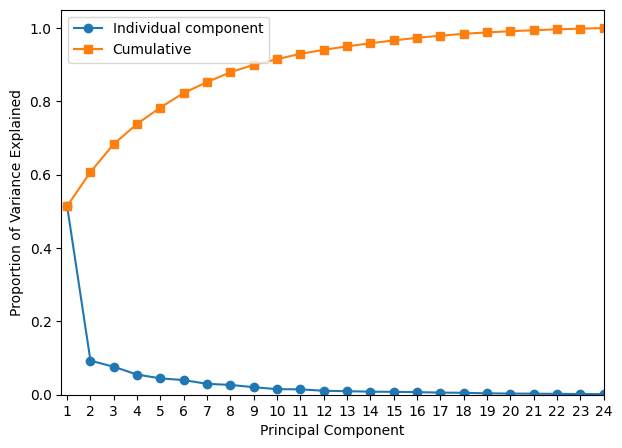

In [21]:
pca_X = PCA()
pcs = [f"pc{i}" for i in range(1, 25)]
pca_loadings = pd.DataFrame(pca_X.fit(selected_X).components_.T, index= selected_X.columns, columns = pcs)
pc_scores = pd.DataFrame(pca_X.fit_transform(selected_X), columns=pcs, index=selected_X.index)
pc_scores.head(6)
np.sum(pc_scores.var())
plt.figure(figsize=(7,5))
plt.plot((range(1, 25)), pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot((range(1, 25)), np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks((range(1, 25)))
plt.legend(loc=2)

Text(0.5, 1.0, 'K-Means Clustering Results with K=2')

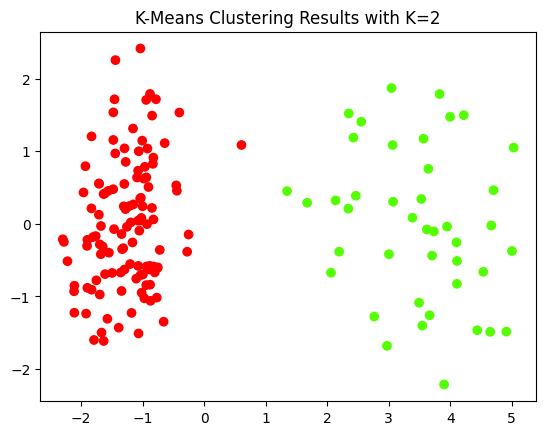

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, n_init=25, random_state=0)
km.fit(selected_X)
plt.scatter(pc_scores['pc1'], pc_scores['pc2'], c=km.labels_, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=2')

The best K for K means clustering is 2.

## Q8.

In [23]:
selected_X = df.drop(columns=['class'])
selected_y=df['class']
selected_y

3      0
9      0
11     0
14     0
20     0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 158, dtype: int8

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_y, test_size=0.3, random_state=1)
y_train

352    1
370    1
127    0
291    1
307    1
      ..
373    1
377    1
285    1
382    1
226    0
Name: class, Length: 110, dtype: int8

## Q9.

### Classifier 1: Random Forest Classifier

Robustness: According to my understanding, Random Forest is a method of ensembling that combines the forecast from numerous decision trees; thus it is less likely to overfit than just a single decision tree.

Handling Non-Linearity: Because of being capable of effectively dealing with non-linear data, this approach becomes applicable in cases where there are intricate relationships between variables beyond linearity.

Feature Importance: In medical datasets which require identification of influential factors for proper diagnosis or treatment planning, Random Forests may help identify what features are most important when predicting the outcome.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier(random_state=0,criterion='entropy',
                                       max_depth=1, 
                                       min_samples_leaf=4, min_samples_split=8, 
                                       n_estimators=29)

rf_classifier.fit(X_train, y_train)
rf_classifier_acc = accuracy_score(y_test,rf_classifier.predict(X_test))
rf_predictions = rf_classifier.predict(X_test)

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf_classifier.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_classifier_acc} \n")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9791666666666666 



### Classifier 2:Decision tree
Decision tree help in identifying the critical variables that are most influential in predicting outcomes, which can be vital for diagnosing diseases, recommending treatments, or predicting the likelihood of certain medical conditions. 

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
cs_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [27]:
pred = cs_dt.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'

## Q10 

In [28]:
#Random Foest performance Metrics
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf_classifier.predict(X_test))}\n")

Confusion Matrix :- 
[[12  1]
 [ 0 35]]



In [29]:
#Decision Tree performance Metrics
cm

Predicted,No,Yes
True,,
No,13,0
Yes,0,35


Comapre the performance matrix of randomforest with decision. the decision tree's performance is better. Ckd and NotCkd patients are well classified.

## Q11.

In [30]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
f_m = LinearRegression()

We used Sequential Feature Selector to select the fetures.

In [31]:
sfs = SFS(
    f_m,
    k_features=(1,8),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sfs = sfs.fit(X_train, y_train)

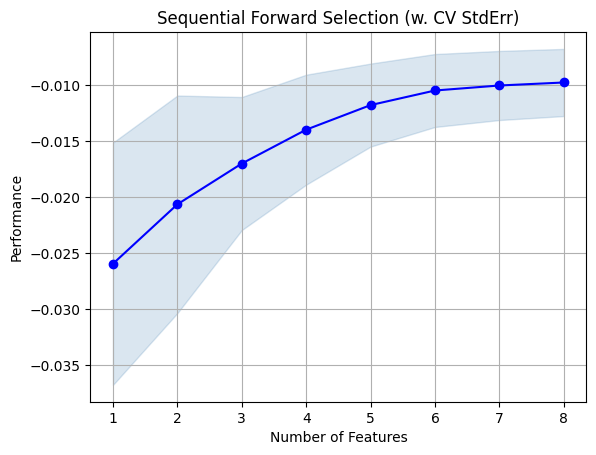

In [33]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()


In [34]:
X_train.columns[list(sfs.k_feature_idx_)]


Index(['sg', 'al', 'rbc', 'hemo', 'pcv', 'wbcc', 'htn', 'ane'], dtype='object')

In [35]:
sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]
sfs_m = LinearRegression()
sfs_m.fit(X_train_sfs, y_train)
sfs_test = sfs_m.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_test))


0.12508367142927507

The MSE for features selected is 0.12508367142927507, meaning that the average squared deviation of the model's predictions from the actual outcomes is relatively low. This indicates that the model with the selected features — specifically 'sg', 'al', 'rbc', 'hemo', 'pcv', 'wbcc', 'htn', and 'ane' — performs well in predicting the target variable with minimal error. This subset of features effectively captures the essential patterns in the data, suggesting a strong predictive relationship between these features and the response variable.

## Q12

In [36]:
dtc = DecisionTreeClassifier()
# Fit the classifiers to the training data
dtc.fit(X_train, y_train)
# Make predictions on the test set
dtc_predictions = dtc.predict(X_test)
# Calculate and print the accuracy for both classifiers
dtc_acc = accuracy_score(y_test, dtc_predictions)
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Test Accuracy of Random Forest Classifier is {rf_classifier_acc} \n")

Test Accuracy of Decision Tree Classifier is 1.0 

Test Accuracy of Random Forest Classifier is 0.9791666666666666 



The test accuracy of Decision Tree Classifier is slighly higher than that of random classifier.

The Random Forest classifier incorrectly classified a "No" instance as a "Yes", showing high sensitivity and very good specificity with minimal false positives. In contrast, the decision tree achieved perfect accuracy on the test set, correctly predicting all instances without any errors, reflecting ideal sensitivity and specificity.

While the decision tree slightly outperforms the random forest in this example, it does not decisively determine their overall accuracy. A thorough model evaluation, including cross-validation and more extensive data testing, is essential to confirm their true predictive power and reliability.

## Q13.

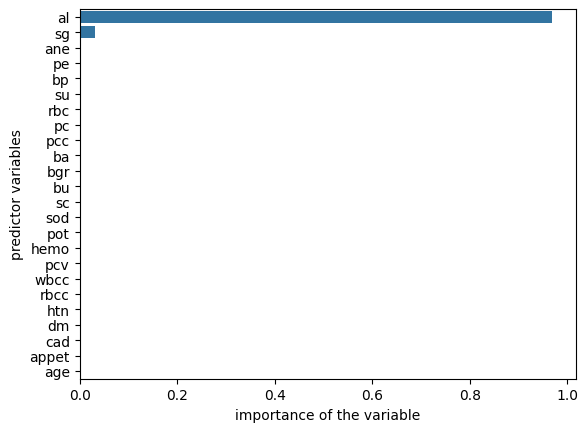

In [37]:
ICI = DecisionTreeClassifier(max_depth = 7)
ICI.fit(selected_X, selected_y)
feature_importances = ICI.feature_importances_
19
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = selected_X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.xlabel('importance of the variable')
plt.ylabel('predictor variables')
plt.show()

From the abve figure, we can see that the 'al' vatiable which represents albumin in the blood has  remarkable influence to the forecast of early stage Chronic Kidney Disease (CKD) for people. 

However, the result shown in this figure is too absolute, which affects the forecast of early stage Chronic Kidney Disease. It should be the result of the combination of multiple indicators of the human body, which may be caused by mistakes in the selection of data.

## Q14

In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
from sklearn.tree import DecisionTreeClassifier
X_1, y_1 = sm.fit_resample(selected_X, selected_y)
X_train, X_test, y_train, y_test = train_test_split(X_1,
                                                    y_1,
                                                    test_size=0.3,
                                                    random_state=1)


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"The training Accuracy of Decision Tree Classifier: {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier: {dtc_acc} \n")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :\n {classification_report(y_test, dtc.predict(X_test))}")

The training Accuracy of Decision Tree Classifier: 1.0
Test Accuracy of Decision Tree Classifier: 1.0 

Confusion Matrix : 
[[41  0]
 [ 0 28]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        28

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



Due to the overly favorable results, we believe that the high accuracy of the training and test sets may be a sign of overfitting, although the perfect test scores suggest that the model may be well suited to this particular dataset.

In summary, although the model shows excellent performance metrics, caution is warranted. It would be helpful to ensure that these results are not just due to overfitting or specificity in the distribution of the dataset, especially if SMOTE is used to balance the classes.

## Q15

Jiawei Li:
- Create git repo
- Codeing and analysis for question: 1,2,3,4
- Fixing and improveing for question: 

Hongbo Yao:
- Codeing and analysis for question: 5,6,7,10,11
- Fixing and improveing for question: 2,9

Name: Xinqi Wang
- Codeing and analysis for question: 9,12,13,14
- Fixing and improveing for question: 7

## 16. **Link** to the public GitHub repository.

\newpage

## Reference(MLA8 formate)

“UCI Machine Learning Repository.” Archive.ics.uci.edu, archive.ics.uci.edu/dataset/336/chronic+kidney+disease.



\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
